# Handwritten Digit Recognition

In [14]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# x = load_digits().data

In [16]:
x,y = load_digits().data, load_digits().target

In [17]:
#y.shape

In [18]:
x.shape

(1797, 64)

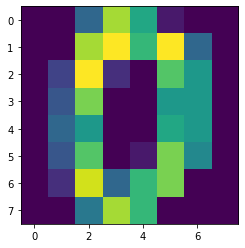

In [19]:
plt.imshow(x[0].reshape(8,8))

In [20]:
def softmax(a):
    e_a = np.exp(a)
    ans = e_a/np.sum(e_a, axis = 1, keepdims = True)
    return ans

In [21]:
softmax([[90,10],[70,30]])

array([[1.00000000e+00, 1.80485139e-35],
       [1.00000000e+00, 4.24835426e-18]])

In [22]:
class NN:
    def __init__(self, input_size = 64, layers = [500,1000],output = 10):
        np.random.seed(0)
        model= {}
        model['w1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['w2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['w3'] = np.random.randn(layers[1],output)
        model['b3'] = np.zeros((1,output))
        
        self.model = model
        
    def forward(self,x):
        z1 = np.dot(x, self.model['w1']) + self.model['b1']
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1, self.model['w2']) + self.model['b2']
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2, self.model['w3']) + self.model['b3']
        Y = np.tanh(z3)
        
        self.activation_outputs = (a1,a2,Y)
        return Y
    
    def backward(self, x, y, learning_rate = 0.01):
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        a1, a2, Y = self.activation_outputs
        
        delta3 = Y - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis = 0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3, w3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis = 0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2, w2.T)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis = 0)/float(m)
        
        self.model['w1'] -= learning_rate*dw1/m
        self.model['b1'] -= learning_rate*db1
        
        self.model['w2'] -= learning_rate*dw2/m
        self.model['b2'] -= learning_rate*db2
        
        self.model['w3'] -= learning_rate*dw3/m
        self.model['b3'] -= learning_rate*db3
        
    def predict(self, X):
        y_out = self.forward(x)
        return np.argmax(y_out, axis = 1)        

In [23]:
def loss(y_oht, Y):
    l = -np.mean(y_oht*np.log(Y))
    return 1

In [24]:
def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [25]:
def train(x, y, model, epochs, learning_rate = 0.01, logs = True):
    training_loss=[]
    classes = 10
    y_oht = one_hot(y, classes)
    for ix in range(epochs):
        Y = model.forward(x)
        l = loss(y_oht,Y)
        model.backward(x, y_oht, learning_rate)
        training_loss.append(l)
        if(logs):
            print("Epoch %d loss %.4f"%(ix,l))
    return training_loss

In [26]:
model = NN()

In [27]:
loss = train(x,y,model,700)

<ipython-input-23-99ce519c0905>:2: RuntimeWarning: invalid value encountered in log
  l = -np.mean(y_oht*np.log(Y))


NameError: name 'X' is not defined

In [28]:
ypred =model.predict(x)

In [29]:
np.mean(ypred == y)

0.08235948803561491

In [30]:
plt.imshow(X[45].reshape(8,8))

NameError: name 'X' is not defined

In [130]:
ypred[45]

5

In [131]:
y[15] 

5